In [ ]:
import pandas as pd

data = pd.read_csv("../data/mxmh_survey_results.csv")   # Modify dataset path if necessary
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [188]:
data=data.drop(columns=["Timestamp","Permissions"])
data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [189]:
numerical_cols = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
categorical_cols = data.drop(columns=numerical_cols).columns.to_list()
categorical_cols

['Primary streaming service',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Music effects']

# Data preparation

In [190]:
data2 = data[data["Music effects"].notna()]
data2.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [ ]:
from scipy.stats.mstats import winsorize

df = data2
df["BPM"] = winsorize(data2["BPM"].values, limits=(0.05, 0.15))
df["Hours per day"] = winsorize(data2["Hours per day"].values, limits=(0.05, 0.055))

for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

In [192]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

binary_cols = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

nominal_cols = ['Primary streaming service', 'Fav genre']

ordinal_cols = [
    'Frequency [Classical]',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]'
]

frequency_order = ["Never", "Rarely", "Sometimes", "Very frequently"]

X = df.drop(columns="Music effects")
y = df['Music effects']

binary_transformer = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['No', 'Yes']] * len(binary_cols), handle_unknown='use_encoded_value', unknown_value=-1))
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

ordinal_transformer = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[frequency_order] * len(ordinal_cols), handle_unknown='use_encoded_value', unknown_value=-1))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])

le_target = LabelEncoder()
y = le_target.fit_transform(y) #encoded



In [193]:
from sklearn.compose import ColumnTransformer

preprocessing_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_cols),    
    ('bin', binary_transformer, binary_cols),
    ('nom', nominal_transformer, nominal_cols),
    ('ord', ordinal_transformer, ordinal_cols)    
])

In [194]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

if not np.isclose(train_ratio + val_ratio + test_ratio, 1.0):
    print("Warning: Split ratios do not sum to 1. Adjusting...")
    total_ratio = train_ratio + val_ratio + test_ratio
    train_ratio /= total_ratio
    val_ratio /= total_ratio
    test_ratio /= total_ratio

test_val_ratio = val_ratio + test_ratio

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=test_val_ratio,
    stratify=y
)

test_size_relative_to_temp = test_ratio / test_val_ratio

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=test_size_relative_to_temp,
    stratify=y_temp
)

# Models

## Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

logistic_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("pca", PCA(n_components=40)),
    ("logistic", LogisticRegression(max_iter=10000))
])

In [196]:
%%time
logistic_pipeline.fit(X_train, y_train)

CPU times: total: 109 ms
Wall time: 29 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'BPM', 'Anxiety',
                                                   'Depression', 'Insomnia',
                                                   'OCD']),
                                                 ('bin',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']],
                                                                                  ha...
                                                   'Frequency [Country]',
                                                   'Frequency [EDM]',
                                                   'Frequency [Folk]',
                                                   'Frequency [Gospel]',
                                                   'Frequency [Hip hop]',
                                                   'Frequency [Jazz]',
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]'])])),
                ('pca', PCA(n_components=40)),
                ('logistic', LogisticRegression(max_iter=10000))])

In [197]:
predictions_train = logistic_pipeline.predict(X_train)
y_pred_lr = logistic_pipeline.predict(X_test)

In [198]:
print(logistic_pipeline.score(X_train, y_train))
print(logistic_pipeline.score(X_test, y_test))

0.7628865979381443
0.7534246575342466


## Support Vector Classifier

In [199]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("pca", PCA(n_components=40)),
    ("classifier", SVC(gamma='auto'))
])

In [200]:
%%time
svc_pipeline.fit(X_train, y_train)

CPU times: total: 188 ms
Wall time: 28.7 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'BPM', 'Anxiety',
                                                   'Depression', 'Insomnia',
                                                   'OCD']),
                                                 ('bin',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']],
                                                                                  ha...
                                                   'Frequency [Country]',
                                                   'Frequency [EDM]',
                                                   'Frequency [Folk]',
                                                   'Frequency [Gospel]',
                                                   'Frequency [Hip hop]',
                                                   'Frequency [Jazz]',
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]'])])),
                ('pca', PCA(n_components=40)),
                ('classifier', SVC(gamma='auto'))])

In [201]:
predictions_train = svc_pipeline.predict(X_train)
y_pred_svc = svc_pipeline.predict(X_test)

In [202]:
print(svc_pipeline.score(X_train, y_train))
print(svc_pipeline.score(X_test, y_test))

0.7474226804123711
0.7397260273972602


## K-Nearest Neighbors

In [203]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("pca", PCA(n_components=40)),
    ("classifier", KNeighborsClassifier(n_neighbors=6))
])

In [204]:
%%time
knn_pipeline.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 18.1 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'BPM', 'Anxiety',
                                                   'Depression', 'Insomnia',
                                                   'OCD']),
                                                 ('bin',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']],
                                                                                  ha...
                                                   'Frequency [EDM]',
                                                   'Frequency [Folk]',
                                                   'Frequency [Gospel]',
                                                   'Frequency [Hip hop]',
                                                   'Frequency [Jazz]',
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]'])])),
                ('pca', PCA(n_components=40)),
                ('classifier', KNeighborsClassifier(n_neighbors=6))])

In [205]:
predictions_train = knn_pipeline.predict(X_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [206]:
print(knn_pipeline.score(X_train, y_train))
print(knn_pipeline.score(X_test, y_test))

0.7457044673539519
0.726027397260274


## Random Forest

In [207]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("pca", PCA(n_components=40)),
    ("classifier", RandomForestClassifier(n_estimators=300, max_depth=8, random_state=0))
])

In [208]:
%%time
rfc_pipeline.fit(X_train, y_train)

CPU times: total: 2.28 s
Wall time: 1.08 s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Hours per day',
                                                   'BPM', 'Anxiety',
                                                   'Depression', 'Insomnia',
                                                   'OCD']),
                                                 ('bin',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes'],
                                                                                              ['No',
                                                                                               'Yes']],
                                                                                  ha...
                                                   'Frequency [Folk]',
                                                   'Frequency [Gospel]',
                                                   'Frequency [Hip hop]',
                                                   'Frequency [Jazz]',
                                                   'Frequency [K pop]',
                                                   'Frequency [Latin]',
                                                   'Frequency [Lofi]',
                                                   'Frequency [Metal]',
                                                   'Frequency [Pop]',
                                                   'Frequency [R&B]',
                                                   'Frequency [Rap]',
                                                   'Frequency [Rock]',
                                                   'Frequency [Video game '
                                                   'music]'])])),
                ('pca', PCA(n_components=40)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, n_estimators=300,
                                        random_state=0))])

In [209]:
predictions_train = knn_pipeline.predict(X_train)
y_pred_rfc = knn_pipeline.predict(X_test)

In [210]:
print(rfc_pipeline.score(X_train, y_train))
print(rfc_pipeline.score(X_test, y_test))

0.9037800687285223
0.7397260273972602


# Metrics/Results

In [211]:
# y_pred_lr = logistic_pipeline.predict(X_val)
# y_pred_svc = svc_pipeline.predict(X_val)
# y_pred_knn = knn_pipeline.predict(X_val)
# y_pred_rfc = rfc_pipeline.predict(X_val)

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    cohen_kappa_score
)

models = {
    "Logistic Regression": y_pred_lr,
    "Support Vector": y_pred_svc,
    "K-Nearest Neighbors": y_pred_knn,
    "Random Forest": y_pred_rfc
}

for model_name, y_pred in models.items():
    print(f"\n--- Metrics for {model_name} ---")

    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # 2. Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # 3. Precision (per class)
    # 'average=None' returns precision for each class
    # 'target_names' can be used if you have meaningful class labels
    # 'zero_division=0' handles cases where a class has no predicted samples to avoid warnings
    precision_per_class = precision_score(y_test, y_pred, average=None, zero_division=0)
    print(f"Precision (per class): {precision_per_class}")

    # 4. Recall (per class)
    recall_per_class = recall_score(y_test, y_pred, average=None, zero_division=0)
    print(f"Recall (per class): {recall_per_class}")

    # 5. F1-score (per class)
    f1_per_class = f1_score(y_test, y_pred, average=None, zero_division=0)
    print(f"F1-score (per class): {f1_per_class}")

    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Cohen's kappa: {cohen_kappa}")


    # --- Comprehensive Classification Report (combines precision, recall, f1-score) ---
    # This is often the most convenient way to get these per-class metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

In [221]:
y_pred_lr = logistic_pipeline.predict(X_val)

print(f"\n--- Metrics for Logistic Regression ---")

# 1. Confusion Matrix
cm = confusion_matrix(y_val, y_pred_lr)
print("Confusion Matrix:\n", cm)

# 2. Accuracy
acc = accuracy_score(y_val, y_pred_lr)
print(f"Accuracy: {acc:.4f}")

# 3. Precision (per class)
# 'average=None' returns precision for each class
# 'target_names' can be used if you have meaningful class labels
# 'zero_division=0' handles cases where a class has no predicted samples to avoid warnings
precision_per_class = precision_score(y_val, y_pred_lr, average=None, zero_division=0)
print(f"Precision (per class): {precision_per_class}")

# 4. Recall (per class)
recall_per_class = recall_score(y_val, y_pred_lr, average=None, zero_division=0)
print(f"Recall (per class): {recall_per_class}")

# 5. F1-score (per class)
f1_per_class = f1_score(y_val, y_pred_lr, average=None, zero_division=0)
print(f"F1-score (per class): {f1_per_class}")

cohen_kappa = cohen_kappa_score(y_val, y_pred_lr)
print(f"Cohen's kappa: {cohen_kappa}")


# --- Comprehensive Classification Report (combines precision, recall, f1-score) ---
# This is often the most convenient way to get these per-class metrics
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr, zero_division=0))


--- Metrics for Logistic Regression ---
Confusion Matrix:
 [[53  2  0]
 [14  3  0]
 [ 1  0  0]]
Accuracy: 0.7671
Precision (per class): [0.77941176 0.6        0.        ]
Recall (per class): [0.96363636 0.17647059 0.        ]
F1-score (per class): [0.86178862 0.27272727 0.        ]
Cohen's kappa: 0.1748670212765958

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        55
           1       0.60      0.18      0.27        17
           2       0.00      0.00      0.00         1

    accuracy                           0.77        73
   macro avg       0.46      0.38      0.38        73
weighted avg       0.73      0.77      0.71        73



In [213]:
from sklearn.metrics import cohen_kappa_score
for model_name, y_pred in models.items():
    print(f"\n--- Metrics for {model_name} ---")
    print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))


--- Metrics for Logistic Regression ---
Cohen's Kappa: 0.14397394136807828

--- Metrics for Support Vector ---
Cohen's Kappa: 0.0

--- Metrics for K-Nearest Neighbors ---
Cohen's Kappa: -0.02528089887640461

--- Metrics for Random Forest ---
Cohen's Kappa: -0.02528089887640461


# Modifiers

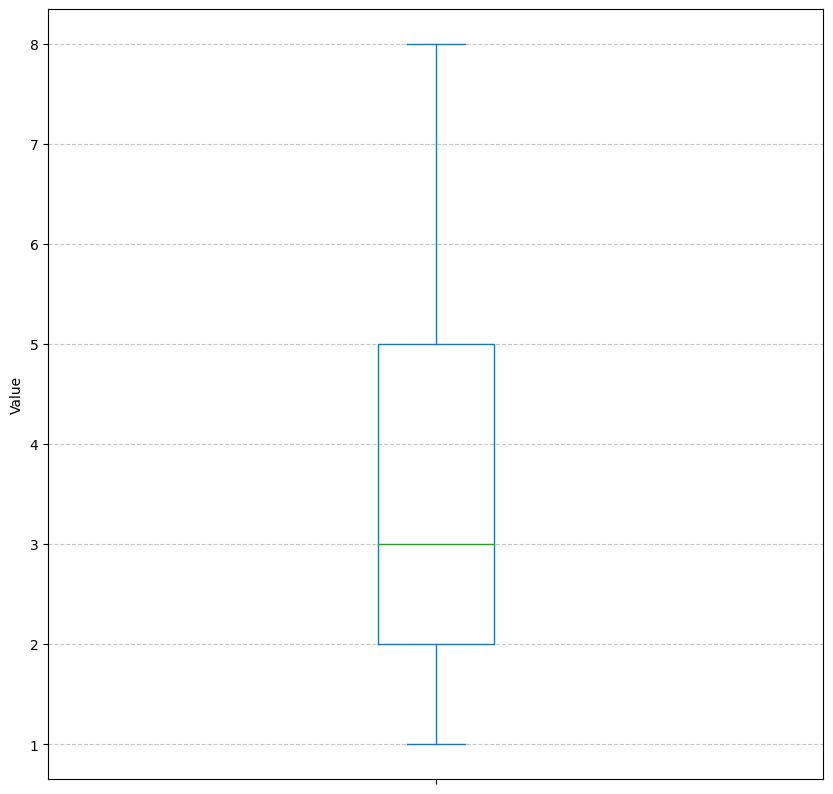

In [214]:
d = winsorize(data["Hours per day"].values, limits=(0.05, 0.075))
d=pd.Series(d)

fig, axes = plt.subplots(figsize=(10, 10))
d.plot.box()
# axes.set_title(f'Distribution of "Hours per day"')
axes.set_ylabel('Value')
axes.set_xlabel('')
axes.grid(axis='y', linestyle='--', alpha=0.7)

In [215]:
df.isna().sum()

Age                             1
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [216]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data2["Music effects"])
'''
Labels are:
0: "Improve"
1: "No effect"
2: "Worsen"
'''
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
frequency_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

for col in ['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
       'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal',
       'Folk', 'Lofi', 'Gospel']:
    data2[f'Frequency [{col}]'] = data2[f'Frequency [{col}]'].map(frequency_map)
data2

In [218]:
print(data2.isnull().sum())

Age                             1
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [ ]:
data_y_clean = data[data["Music effects"].notna()]
data_y_clean = data_y_clean.drop(columns=["Timestamp","Permissions"])
data_y_clean

In [ ]:
numerical_cols = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
categorical_cols = data_y_clean.drop(columns=numerical_cols).columns.to_list()

In [ ]:
cat_freq = ['While working',
 'Instrumentalist',
 'Composer',
 'Exploratory',
 'Foreign languages',
 'Music effects']
long_cat = ['Primary streaming service','Fav genre']

In [ ]:
freq_cols = [col for col in categorical_cols if col not in (cat_freq+long_cat)]
freq_cols

['Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]']

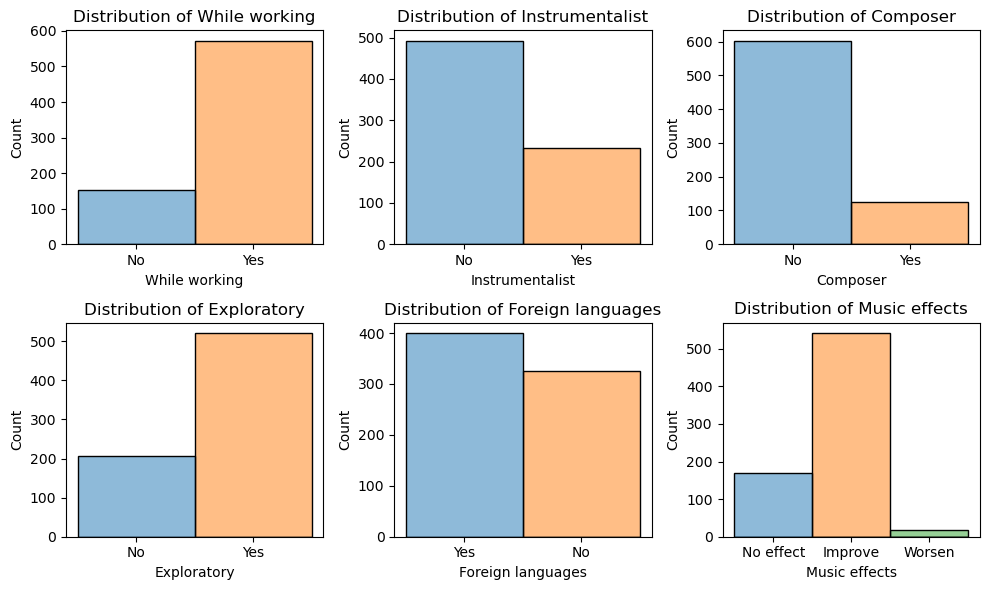

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# data_y_clean[categorical_cols].hist(figsize=(12, 6), bins=15)
# data_y_clean['Fav genre'].hist(figsize=(12, 6))
# sns.histplot(data=data_y_clean, x='Fav genre')
# len(categorical_cols)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(cat_freq):
    if i < len(axes):
        sns.histplot(data=data_y_clean, x=col, ax=axes[i], hue=col, legend=False)
        # data_y_clean.boxplot(column=col, ax=axes[i], grid=False)
        axes[i].set_title(f'Distribution of {col}')
        # axes[i].set_ylabel('Value')
        # axes[i].set_xlabel('')
        # axes[i].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
hist_dat = data_y_clean
hist_dat['Primary streaming service']=hist_dat['Primary streaming service'].replace("Other streaming service","Other")
hist_dat['Primary streaming service']=hist_dat['Primary streaming service'].replace("I do not use a streaming service.","Doesn't stream")
hist_dat["Primary streaming service"].unique()

array(['Spotify', 'YouTube Music', "Doesn't stream", 'Apple Music',
       'Other', 'Pandora', nan], dtype=object)

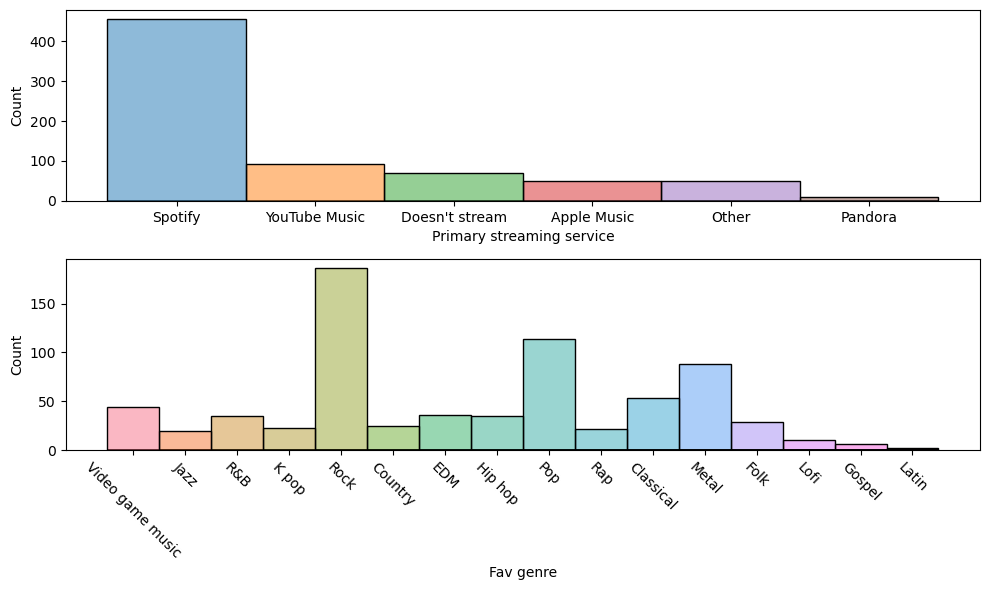

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
axes = axes.flatten()
plt.xticks(rotation=-45)
for i, col in enumerate(long_cat):
    if i < len(axes):
        sns.histplot(data=hist_dat, hue=col, x=col, ax=axes[i], legend=False)
        # data_y_clean.boxplot(column=col, ax=axes[i], grid=False)
        # axes[i].set_title(f'Distribution of {col}')
        # axes[i].set_ylabel('Value')
        # axes[i].set_xlabel('')
        # axes[i].grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

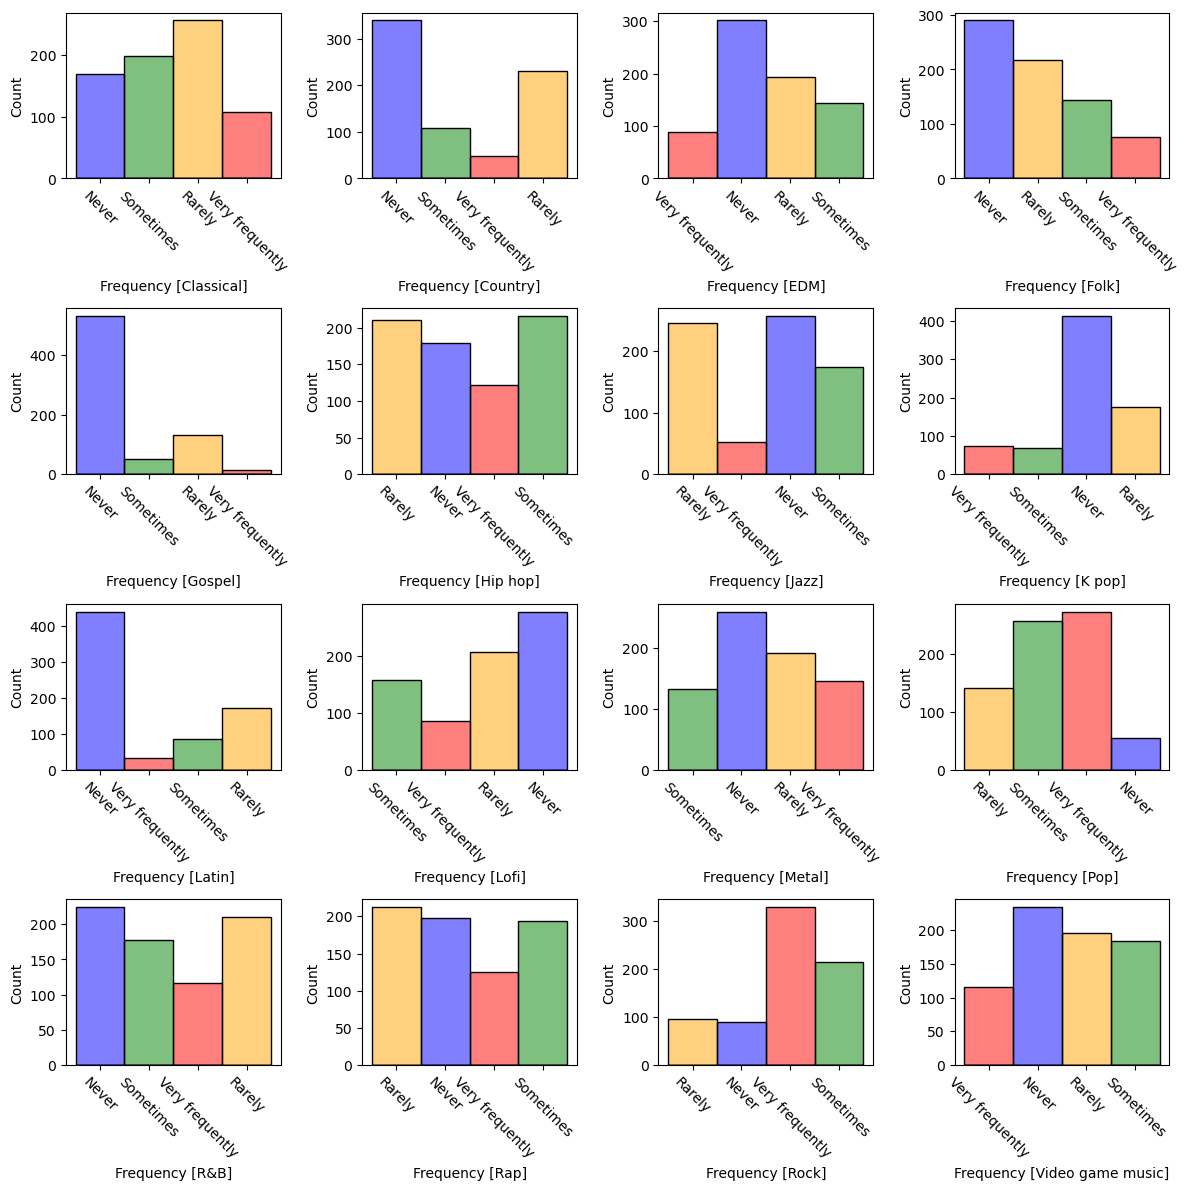

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()
color_palette = {"Never": "blue", "Rarely": "orange", "Sometimes": "green", "Very frequently": "red"}
category_order = ["Never", "Rarely", "Sometimes", "Very frequently"]

for i, col in enumerate(freq_cols):
    if i < len(axes):
        sns.histplot(data=hist_dat, hue=col, x=col, ax=axes[i], legend=False, palette=color_palette, hue_order=category_order)
        axes[i].tick_params(axis='x', rotation=-45)
plt.tight_layout()
plt.show()

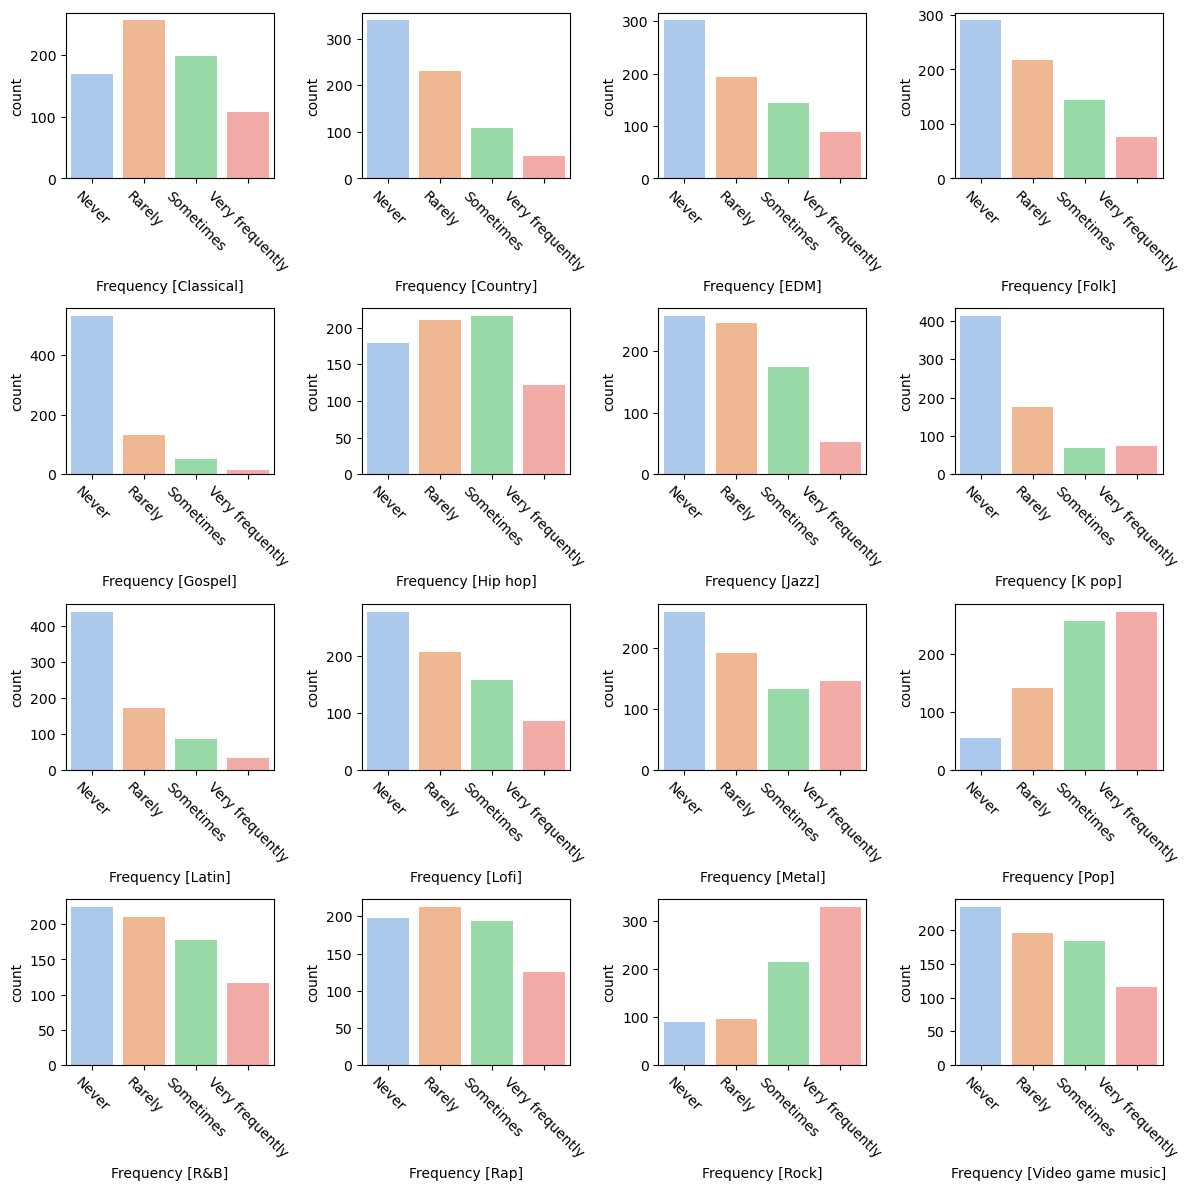

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
axes = axes.flatten()
palette = sns.color_palette("pastel")
color_palette = {"Never": palette[0], "Rarely": palette[1], "Sometimes": palette[2], "Very frequently": palette[3]}
category_order = ["Never", "Rarely", "Sometimes", "Very frequently"]

for i, col in enumerate(freq_cols):
    if i < len(axes):
        sns.countplot(data=hist_dat, hue=col, x=col, ax=axes[i], legend=False, palette=color_palette, order=category_order)
        axes[i].tick_params(axis='x', rotation=-45)
plt.tight_layout()
plt.show()

<Axes: >

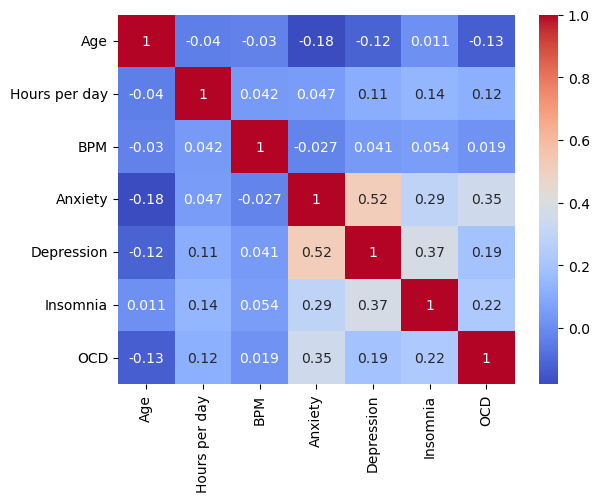

In [ ]:
corr = data_y_clean[numerical_cols].corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm")

In [ ]:
ca = [col for col in categorical_cols if col in (cat_freq+long_cat)]
cd = ca + numerical_cols
cd

['Primary streaming service',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'Music effects',
 'Age',
 'Hours per day',
 'BPM',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD']

Text(0.5, 1.0, 'Chi-Square Test p-value Heatmap')

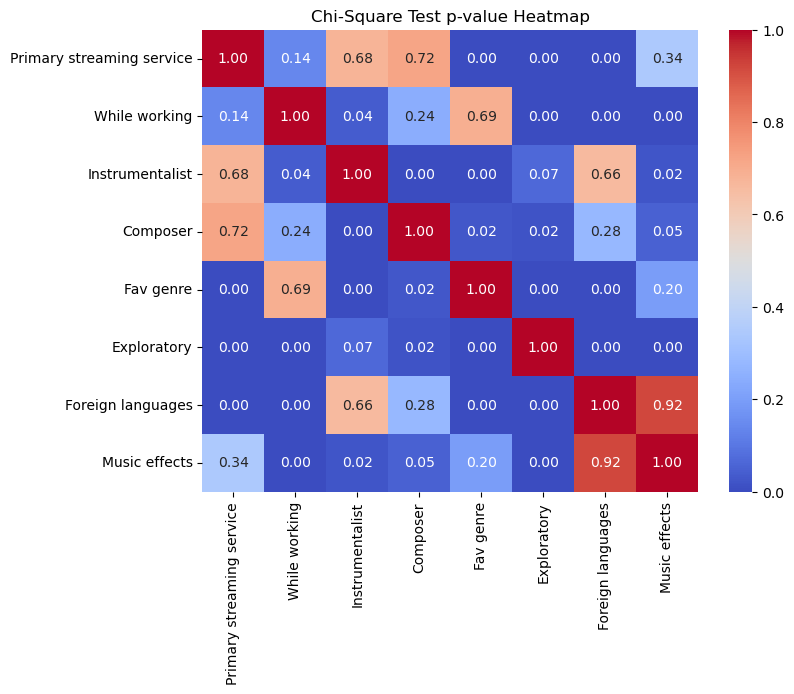

In [ ]:
import scipy.stats as stats

p_value_matrix = pd.DataFrame(index=ca, columns=ca)

# Iterate through each pair of columns
# for col1 in data_y_clean.columns:
#     for col2 in data_y_clean.columns:
for col1 in ca:
    for col2 in ca:
        if col1 != col2:
            # Create a contingency table for the pair of variables
            contingency_table = pd.crosstab(data_y_clean[col1], data_y_clean[col2])
            
            # Perform the Chi-Square test
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            
            # Store the p-value in the matrix
            p_value_matrix.loc[col1, col2] = p
        else:
            # Set the p-value for the same variable with itself to 1 (no test needed)
            p_value_matrix.loc[col1, col2] = 1.0

# Convert p-values to numeric
p_value_matrix = p_value_matrix.astype(float)

# Plot the heatmap of p-values
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Chi-Square Test p-value Heatmap")

In [ ]:
import numpy as np
lower = data["BPM"].quantile(0.01)
upper = data["BPM"].quantile(0.99)

df_capped = data.copy()
df_capped["BPM"] = np.clip(df_capped["BPM"], lower, upper)
df_capped["BPM"].describe()

count    629.000000
mean     123.220350
std       32.982317
min       43.360000
25%      100.000000
50%      120.000000
75%      144.000000
max      209.440000
Name: BPM, dtype: float64

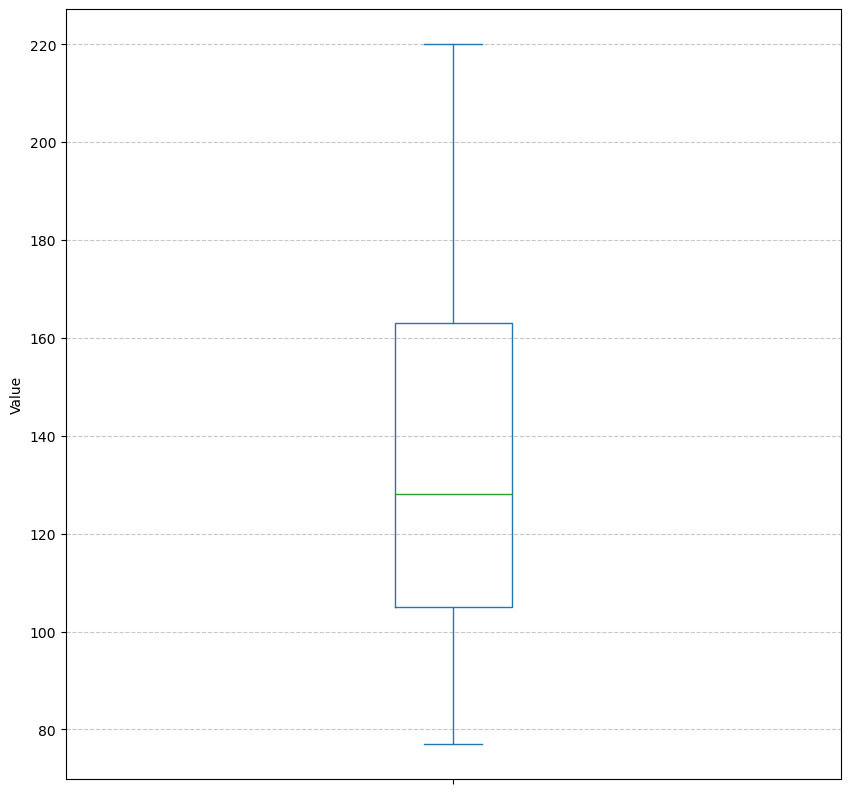

In [ ]:
from scipy.stats.mstats import winsorize
d = winsorize(data["BPM"].values, limits=(0.05, 0.15))
d=pd.Series(d)

fig, axes = plt.subplots(figsize=(10, 10))
# axes = axes.flatten()

d.plot.box()
# axes.set_title(f'Distribution of "BPM"')
axes.set_ylabel('Value')
axes.set_xlabel('')
axes.grid(axis='y', linestyle='--', alpha=0.7)

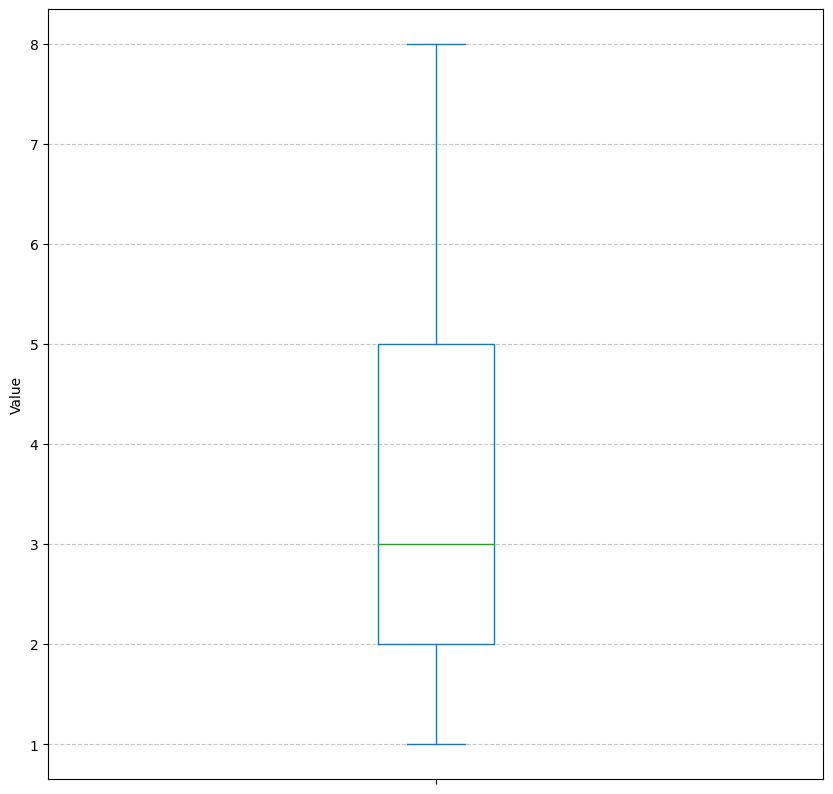

In [ ]:
d = winsorize(data["Hours per day"].values, limits=(0.05, 0.075))
d=pd.Series(d)

fig, axes = plt.subplots(figsize=(10, 10))
d.plot.box()
# axes.set_title(f'Distribution of "Hours per day"')
axes.set_ylabel('Value')
axes.set_xlabel('')
axes.grid(axis='y', linestyle='--', alpha=0.7)

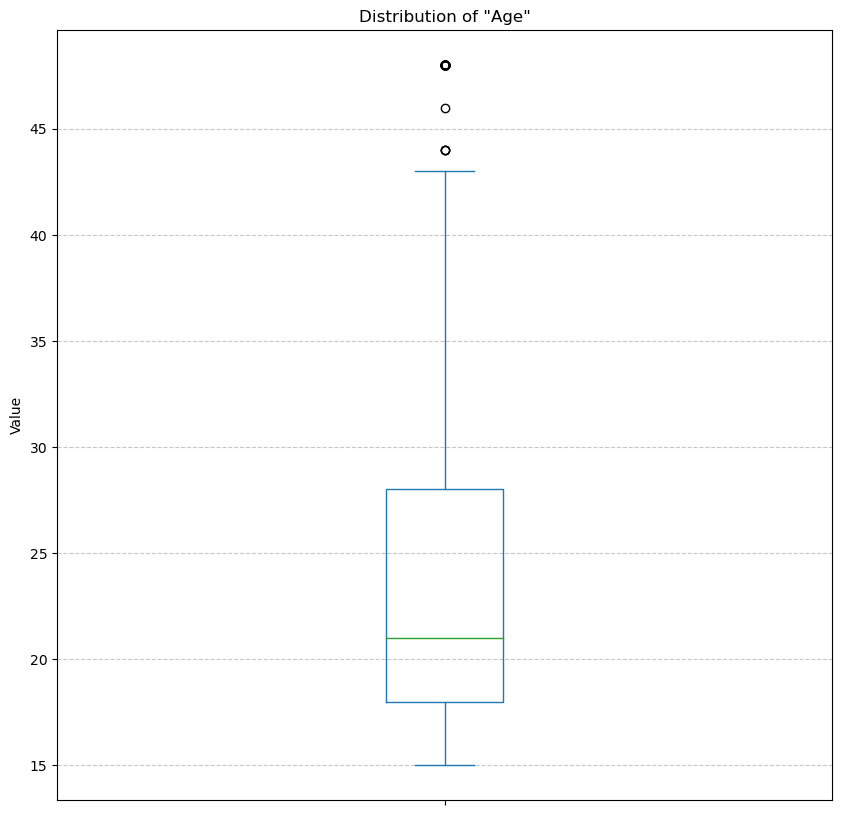

In [ ]:
d = winsorize(data["Age"].values, limits=(0.05, 0.075))
d=pd.Series(d)

fig, axes = plt.subplots(figsize=(10, 10))
d.plot.box()
axes.set_title(f'Distribution of "Age"')
axes.set_ylabel('Value')
axes.set_xlabel('')
axes.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
data_y_clean["Hours per day"].describe()

count    728.000000
mean       3.591415
std        3.038554
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       24.000000
Name: Hours per day, dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessing_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_cols),
    ("categorical", OneHotEncoder(), categorical_cols),
])